In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
# Load the synthetic dataset created earlier
df = pd.read_csv("synthetic_income_data.csv")

# Show first few rows
df.head()


,age,education_level,employment_type,region,night_light,gov_subsidy,electricity_access,repayment_status
0,56,No formal,Unemployed,Rural,81.111240,0,1,Poor
1,46,High School,Unemployed,Rural,36.209231,1,0,Poor
2,32,Graduate,Salaried,Semi-urban,12.045687,0,1,Good
3,25,Graduate,Unemployed,Rural,45.709937,1,1,Poor
4,38,No formal,Casual,Rural,66.514395,0,1,Poor


In [ ]:
# List of categorical columns
categorical_cols = ['education_level', 'employment_type', 'region']

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# View new DataFrame shape and features
print("✅ One-hot encoding done.")
df_encoded.head()


✅ One-hot encoding done.


,age,night_light,gov_subsidy,electricity_access,repayment_status,education_level_Graduate,education_level_High School,education_level_No formal,education_level_Primary,employment_type_Casual,employment_type_Salaried,employment_type_Self-employed,employment_type_Unemployed,region_Rural,region_Semi-urban,region_Urban
0,56,81.111240,0,1,Poor,False,False,True,False,False,False,False,True,True,False,False
1,46,36.209231,1,0,Poor,False,True,False,False,False,False,False,True,True,False,False
2,32,12.045687,0,1,Good,True,False,False,False,False,True,False,False,False,True,False
3,25,45.709937,1,1,Poor,True,False,False,False,False,False,False,True,True,False,False
4,38,66.514395,0,1,Poor,False,False,True,False,True,False,False,False,True,False,False


In [ ]:
# Encode repayment_status (Yes/No) to 1/0
label_encoder = LabelEncoder()
df_encoded['repayment_status'] = label_encoder.fit_transform(df_encoded['repayment_status'])

# Check value counts
df_encoded['repayment_status'].value_counts()


,count
repayment_status,
2,635
0,247
1,118


In [ ]:
# Separate features and target
X = df_encoded.drop('repayment_status', axis=1)
y = df_encoded['repayment_status']

print("✅ Features and target split.")


✅ Features and target split.


In [ ]:
# Standardize (normalize) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features standardized.")

✅ Features standardized.


In [ ]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("✅ Data split into training and test sets.")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


✅ Data split into training and test sets.
Training samples: 800
Testing samples: 200


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Initialize the model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

print("✅ Logistic Regression model trained.")

✅ Logistic Regression model trained.


In [ ]:
# Make predictions
y_pred = logreg_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {acc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Accuracy: 1.0000

📊 Confusion Matrix:
[[ 53   0   0]
 [  0  23   0]
 [  0   0 124]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: title={'center': 'Feature Importance (Logistic Regression)'}>

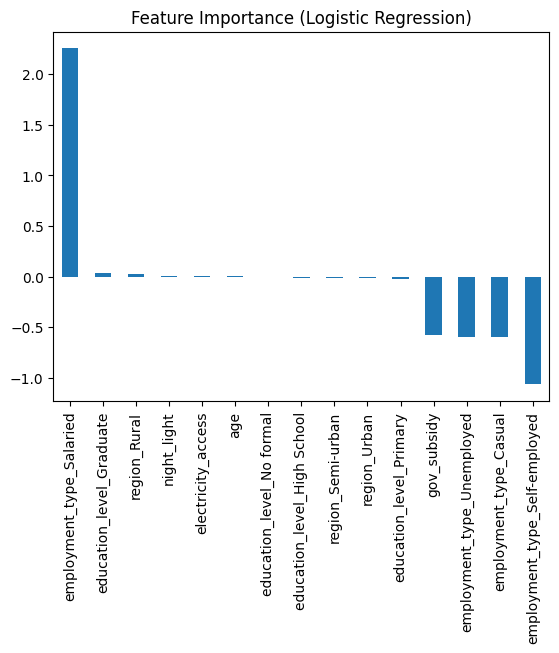

In [ ]:
# Get feature importance (coefficients)
feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (Logistic Regression)')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained.")

✅ Random Forest model trained.


In [ ]:
# Make predictions
rf_preds = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_preds)
print(f"🔍 Random Forest Accuracy: {rf_acc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, rf_preds))

🔍 Random Forest Accuracy: 1.0000

📊 Confusion Matrix:
[[ 53   0   0]
 [  0  23   0]
 [  0   0 124]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



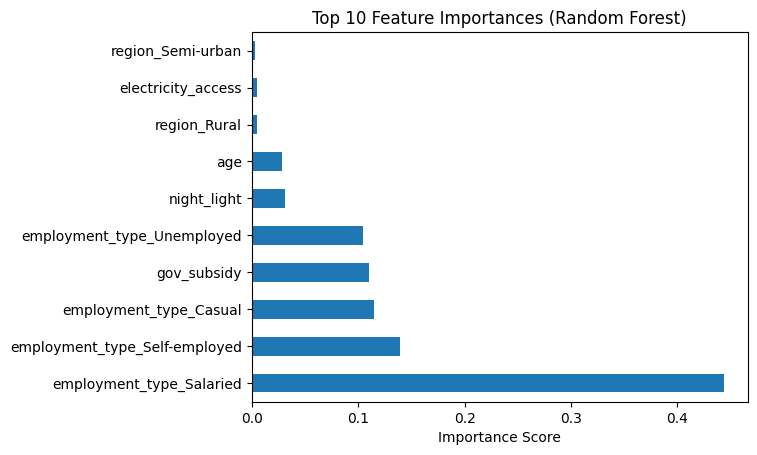

In [ ]:
# Feature importance visualization
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("✅ XGBoost model trained.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost model trained.


In [ ]:
# Predictions
xgb_preds = xgb_model.predict(X_test)

# Accuracy
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"🔍 XGBoost Accuracy: {xgb_acc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, xgb_preds))

🔍 XGBoost Accuracy: 1.0000

📊 Confusion Matrix:
[[ 53   0   0]
 [  0  23   0]
 [  0   0 124]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



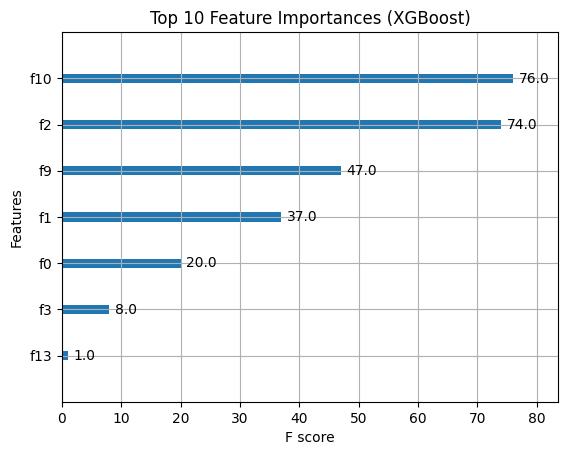

In [ ]:
import matplotlib.pyplot as plt

# Plot top features
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1]
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Parameters
print("🔧 Best Parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔧 Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Predict with tuned model
tuned_preds = best_model.predict(X_test)

# Accuracy
tuned_acc = accuracy_score(y_test, tuned_preds)
print(f"🎯 Tuned XGBoost Accuracy: {tuned_acc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, tuned_preds))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, tuned_preds))

🎯 Tuned XGBoost Accuracy: 1.0000

📊 Confusion Matrix:
[[ 53   0   0]
 [  0  23   0]
 [  0   0 124]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00       124

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'xgboost_best_model.pkl')

print("✅ Model saved successfully as xgboost_best_model.pkl")

✅ Model saved successfully as xgboost_best_model.pkl


In [ ]:
loaded_model = joblib.load('xgboost_best_model.pkl')

In [ ]:
import pandas as pd

# Save test predictions
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': tuned_preds
})

pred_df.to_csv('predictions.csv', index=False)

print("📁 Predictions saved as predictions.csv")

📁 Predictions saved as predictions.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy files to drive
!cp xgboost_best_model.pkl /content/drive/MyDrive/
!cp predictions.csv /content/drive/MyDrive/
!cp synthetic_income_data.csv /content/drive/MyDrive/

Mounted at /content/drive


In [ ]:
!pip install shap

In [ ]:
import shap

# Only works well with tree-based models like XGBoost
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

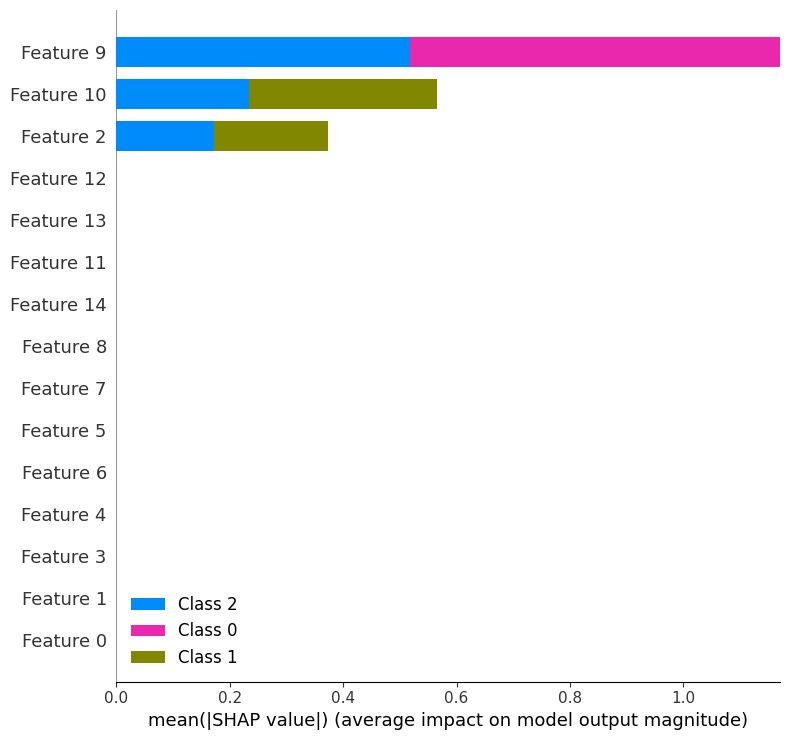

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd # Assuming X_test still needs column names
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are the features and target AFTER one-hot encoding and label encoding
# Ensure df_encoded is available from previous steps
# If not, reload or recreate df_encoded based on your notebook structure
# X = df_encoded.drop('repayment_status', axis=1)
# y = df_encoded['repayment_status']

# Split data BEFORE scaling to easily get original feature values for plotting
# Ensure X and y are defined from previous cells
# X_train_orig, X_test_orig, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# Standardize the split data
# Ensure scaler is initialized
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_orig)
# X_test_scaled = scaler.transform(X_test_orig) # Use transform on test set

# Re-create the explainer using the best_model and the scaled training data
# Ensure best_model is defined from previous cells
# explainer = shap.Explainer(best_model, X_train_scaled)
# shap_values = explainer(X_test_scaled) # This returns the Explanation object

# For the first test instance (index 0 in X_test_scaled and X_test_orig)
shap.initjs()

# Plot the force plot for the first instance (index 0) of the test set.
# Select the SHAP values and base value for the class you want to explain (index 1 for 'Yes').
# The Explanation object supports indexing. shap_values[0] gives the Explanation for the 1st instance.
# .data contains the original feature values for that instance, useful for visualization.
# .values contains the SHAP values for that instance.
# .base_values contains the base value for that instance.
# We also specify class_id=1 to plot the contribution towards the second class (repayment_status = 1, i.e., Yes).

# Note: force_plot's signature for plotting a single instance is:
# shap.force_plot(expected_value, shap_values_for_instance, feature_values_for_instance)
# However, when dealing with a multi-output explainer (like for multi-class classification or regression with multiple targets),
# the Explanation object itself has the structure to hold values for different outputs/classes.
# The force_plot function is designed to handle the Explanation object directly,
# allowing you to specify which instance and which class to plot if the Explanation is multi-dimensional.

# Correct way to plot a single instance from a multi-output Explanation object:
# Pass the entire shap_values Explanation object and specify which instance to plot.
# The 'instance_index' argument allows you to select which row of the Explanation to visualize.
# For multi-class, you might also need to specify the class depending on the SHAP version or context.
# The simplest way that often works is to pass the row of the Explanation object and its data.
# The shap_values object is Explanation(values, base_values, data, display_data, instance_names, feature_names, output_names, clustering, group_display_entries, group_names, top_n, lower_bound, upper_bound, main_effect, interaction_effects, tree_path)
# To plot the first instance for the second class (index 1):
# The shap_values object itself has the structure.
# shap_values[0] is the Explanation for the first instance across all classes.
# shap_values[0, :, 1] gives the SHAP values for the first instance for the second class.
# X_test_orig.iloc[0] gives the original feature values for the first instance.

# Let's try passing the specific instance and class SHAP values and the original features.
# The error suggests visualize expects a full Explanation object structure, not just arrays.

# Let's revisit the shap_values object structure.
# shap_values is an Explanation object.
# shap_values[0] is an Explanation object for the first instance across all classes.
# shap_values[0][:, 1] might give the SHAP values for the second class, but is it still an Explanation object?
# According to the error, slicing seems to break the expected type.

# A working pattern for multi-class is often:
# shap.force_plot(explainer.expected_value[class_index], shap_values[instance_index].values[:, class_index], shap_values[instance_index].data)
# Let's try this:

instance_to_plot = 0 # Plot the first instance
class_to_explain = 1 # Explain the contribution towards class 1 (Yes)

# Check the shape of shap_values.values for a single instance and a single class
# print(shap_values[instance_to_plot].values[:, class_to_explain].shape)
# This shape should be (number_of_features,)

# Check the shape of shap_values[instance_to_plot].data
# print(shap_values[instance_to_plot].data.shape)
# This shape should also be (number_of_features,)

# Check the shape of explainer.expected_value
# print(explainer.expected_value.shape)
# This shape should be (number_of_classes,)

# Now, attempt the force_plot using this structure
shap.force_plot(
    explainer.expected_value[class_to_explain], # Base value for the class
    shap_values[instance_to_plot].values[:, class_to_explain], # SHAP values for the instance and class
    shap_values[instance_to_plot].data # Original feature values for the instance
)